In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob
from datetime import datetime

Text(0, 0.5, 'Wind Speed(m/s)')

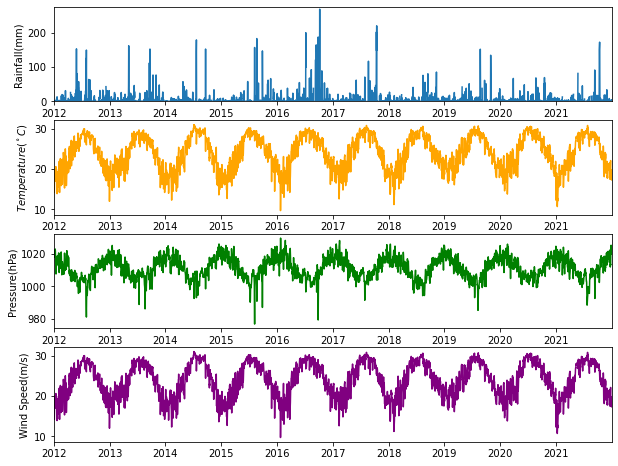

In [87]:
# 讀每個月檔案畫雨量
sta = '466990'
files=glob("/home/nancy/rainfall/%s/*.csv" %(sta)) 
usecol=['ObsTime','StnPres','Temperature','WS','Precp']

file=files[0]
YM=file[-10:-6]+'-'+file[-6:-4]
prodc=pd.read_csv(file,sep=',',header=2,usecols=usecol,na_values=['T','x','&','V','/','...'])
# csv.plot.bar(x=csv.index,y='Precp')
date=pd.date_range(YM+'-'+str(prodc['ObsTime'].iloc[0]).zfill(2),
             YM+'-'+str(prodc['ObsTime'].iloc[-1]).zfill(2),
             freq='D')
prodc['Date']=date
# csv.plot.bar(x='Date',y='Precp')

for file in files[1:]:
    YM=file[-10:-6]+'-'+file[-6:-4]
    csv=pd.read_csv(file,sep=',',header=2,usecols=usecol,na_values=['T','x','&','V','/','...'])
    date=pd.date_range(YM+'-'+str(csv['ObsTime'].iloc[0]).zfill(2),
                 YM+'-'+str(csv['ObsTime'].iloc[-1]).zfill(2),
                 freq='D')
    csv['Date']=date
    
    prodc=pd.concat([prodc,csv])

fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(4,1,1)
plt.plot(prodc['Date'],prodc['Precp'])
ax.set_xlim([datetime(2012,1,1),datetime(2021,12,31)])
ax.set_ylim(0,275)
ax.set_ylabel('Rainfall(mm)')

ax2=fig.add_subplot(4,1,2)
plt.plot(prodc['Date'],prodc['Temperature'],c='orange')
ax2.set_xlim([datetime(2012,1,1),datetime(2021,12,31)])
ax2.set_ylabel('$Temperature(^\circ C)$')

ax3=fig.add_subplot(4,1,3)
plt.plot(prodc['Date'],prodc['StnPres'],c='green')
ax3.set_xlim([datetime(2012,1,1),datetime(2021,12,31)])
ax3.set_ylabel('Pressure(hPa)')

ax4=fig.add_subplot(4,1,4)
plt.plot(prodc['Date'],prodc['Temperature'],c='purple')
ax4.set_xlim([datetime(2012,1,1),datetime(2021,12,31)])
ax4.set_ylabel('Wind Speed(m/s)')